In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from astropy.io import fits
import healpy as hp

In [3]:
# Mult factor 1.55 for the Reich et al. 1.42 GHz survey
# We assumed a 10 % uncertainty in the radio data at all three frequencies. 
# For the 408 MHz map, which has striations, we added an additional 3.8 Jy 
#uncertainty corresponding to the baseline uncertainty of ±3 K (Haslam et al. 1982) at 1◦ angular scales. 

In [4]:
kboltz=1.3806503e-23 #MKS
clight=299792458.0 #MKS
hplanck=6.626068e-34 #MKS
TCMB = 2.72548 #Kelvin
d2r = np.pi / 180.

In [5]:
lonc = 107.2
latc = 5.2
lonra = [lonc-2., lonc+2.]
latra = [latc-2., latc+2.]

In [6]:
haslam0408 = hp.read_map('../externaldata/haslam408_dsds_Remazeilles2014.fits', verbose=False)
haslam0408 = hp.ud_grade(hp.smoothing(haslam0408, fwhm=np.sqrt(60.**2 - 56.**2)/60.*d2r), 512)

Sigma is 9.147476 arcmin (0.002661 rad) 
-> fwhm is 21.540659 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [7]:
#nu = 408.e6
#kthermo_to_intensity = 2. * kboltz * (nu / clight)**2 * hp.nside2pixarea(nside) * 1.e26
#hmap = haslam0408 * kthermo_to_intensity

In [8]:
#hp.write_map('../externaldata/haslam_smoothed.fits', hmap)

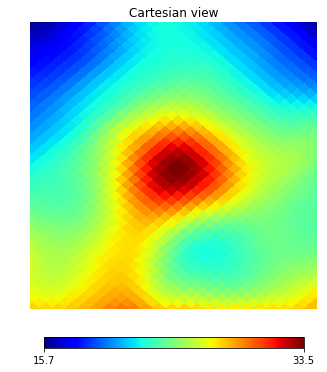

In [9]:
hp.cartview(haslam0408, lonra=lonra, latra=latra)

In [10]:
x = np.copy(haslam0408)
nside = hp.get_nside(x)
vecc = hp.rotator.dir2vec(lonc, latc, lonlat=True)
rmask = hp.query_disc(nside, vecc, 1.*d2r)
amaskout = set(hp.query_disc(nside, vecc, (90./60.)*d2r))
amaskin = set(hp.query_disc(nside, vecc, (67./60.)*d2r))
amask = np.array(list(amaskout.difference(amaskin)))

In [11]:
nu = 408.e6
kthermo_to_intensity = 2. * kboltz * (nu / clight)**2 * hp.nside2pixarea(nside) * 1.e26
y = x * kthermo_to_intensity
rdata = y[rmask]
adata = y[amask]
print np.sum(rdata - np.median(adata))
print np.std(adata) * np.sqrt(len(rdata) + pi/2. * float(len(rdata)**2) / len(adata))

23.6048320934
0.757208896399


In [12]:
# 0.40800000       26.866394       4.8008416

In [20]:
# Remazeilles are good. 

In [12]:
kthermo_to_intensity = 2. * kboltz * (nu / clight)**2 * 1.e26
print 3 * kthermo_to_intensity * d2r * d2r

4.67378356944
